In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('balanced_migraine_data.csv')

# Encode the 'Type' column
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target variables to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=16, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
68/68 [==============================] - 3s 12ms/step - loss: 1.7241 - accuracy: 0.3392 - val_loss: 1.1725 - val_accuracy: 0.7519
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 1.1891 - accuracy: 0.5885 - val_loss: 0.7920 - val_accuracy: 0.8074
Epoch 3/50
68/68 [==============================] - 0s 5ms/step - loss: 0.8548 - accuracy: 0.7164 - val_loss: 0.5591 - val_accuracy: 0.8370
Epoch 4/50
68/68 [==============================] - 0s 4ms/step - loss: 0.7219 - accuracy: 0.7581 - val_loss: 0.4315 - val_accuracy: 0.8519
Epoch 5/50
68/68 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.7915 - val_loss: 0.3562 - val_accuracy: 0.8630
Epoch 6/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.8054 - val_loss: 0.3206 - val_accuracy: 0.8815
Epoch 7/50
68/68 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.8202 - val_loss: 0.2908 - val_accuracy: 0.9000
Epoch 8/50
68/68 [=

11/11 [==============================] - 0s 2ms/step


<Figure size 800x800 with 0 Axes>

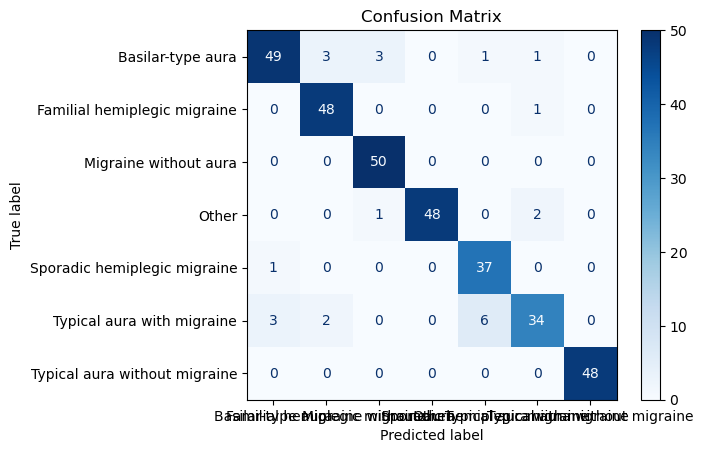

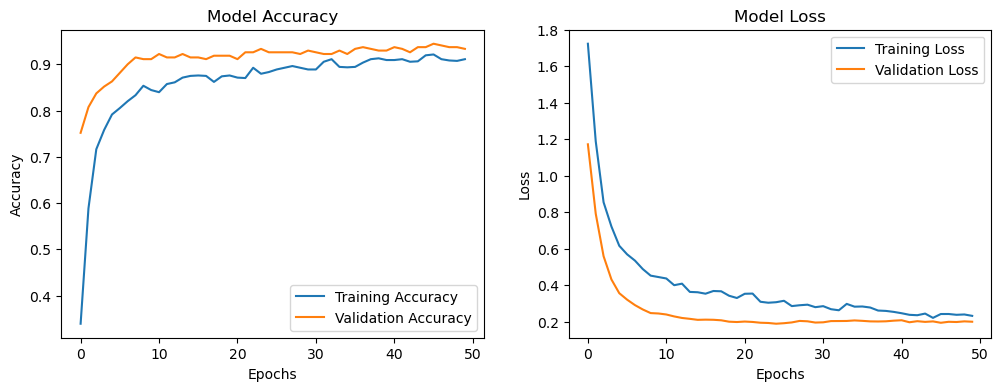

In [6]:

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()